A97066
Question One.

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- importing the dataset.

In [96]:
mosquito_data = pd.read_excel('Mosquito_Dataset.xlsx')

In [97]:
mosquito_data.head()

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
0,kitamilo,spray,CA,yes,NaN,g,3,0,oocyst,oocyst,other,pcr,qpcr
1,kitamilo,spray,MH,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
2,kitamilo,spray,MH,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
3,kitamilo,spray,MI,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
4,kitamilo,spray,MI,yes,NaN,c,0,1,spz,spz,H,pcr,qpcr


In [98]:
mosquito_data.dtypes


village         object
collection      object
origin          object
fed             object
parity          object
species.mol     object
oocyst           int64
spz              int64
infection       object
infection1      object
choice          object
RS_tech         object
spz_tech        object
dtype: object

In [99]:
mosquito_data.describe()

,oocyst,spz
count,2912.000000,2912.000000
mean,0.335165,0.080014
std,3.303126,0.271361
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,78.000000,1.000000


- Checking for null values

In [100]:
mosquito_data.isnull().sum()

village            0
collection         0
origin             0
fed                0
parity          2514
species.mol     2406
oocyst             0
spz                0
infection          0
infection1         0
choice             0
RS_tech            0
spz_tech           0
dtype: int64

Since parity and species.mol are categorical features,
I am imputing with mode.

In [101]:
mosquito_data['species.mol ']=mosquito_data['species.mol '].fillna(mosquito_data['species.mol '].mode()[0])
mosquito_data['parity'] = mosquito_data['parity'].fillna(mosquito_data['parity'].mode()[0])

In [102]:
mosquito_data.isnull().sum()

village         0
collection      0
origin          0
fed             0
parity          0
species.mol     0
oocyst          0
spz             0
infection       0
infection1      0
choice          0
RS_tech         0
spz_tech        0
dtype: int64

Dealing with the problem stetement.

Am to use species.mol as the target variable.

In [103]:
# Attaching labels to the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mosquito_data['collection'] = le.fit_transform(mosquito_data['collection'])
mosquito_data['origin'] = le.fit_transform(mosquito_data['origin'])
mosquito_data['fed'] = le.fit_transform(mosquito_data['fed'])
mosquito_data['parity'] = le.fit_transform(mosquito_data['parity'])
#mosquito_data['species.mol '] = le.fit_transform(mosquito_data['species.mol '])
mosquito_data['infection'] = le.fit_transform(mosquito_data['infection'])
mosquito_data['infection1'] = le.fit_transform(mosquito_data['infection1'])
mosquito_data['choice'] = le.fit_transform(mosquito_data['choice'])
mosquito_data['RS_tech'] = le.fit_transform(mosquito_data['RS_tech'])
mosquito_data['spz_tech'] = le.fit_transform(mosquito_data['spz_tech'])

In [104]:
mosquito_data

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
0,kitamilo,1,0,1,1,g,3,0,0,1,1,1,1
1,kitamilo,1,1,1,1,g,0,1,1,2,0,1,1
2,kitamilo,1,1,1,1,g,0,1,1,2,0,1,1
3,kitamilo,1,2,1,1,g,0,1,1,2,0,1,1
4,kitamilo,1,2,1,1,c,0,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,buvuma,1,1,1,1,c,0,0,2,3,1,0,0
2908,buvuma,1,1,1,1,c,0,0,2,3,1,0,0
2909,buvuma,1,1,1,1,c,0,0,2,3,1,0,0
2910,buvuma,1,1,1,1,c,0,0,2,3,1,0,0


mosq

array([[<AxesSubplot: title={'center': 'collection'}>,
        <AxesSubplot: title={'center': 'origin'}>,
        <AxesSubplot: title={'center': 'fed'}>],
       [<AxesSubplot: title={'center': 'parity'}>,
        <AxesSubplot: title={'center': 'oocyst'}>,
        <AxesSubplot: title={'center': 'spz'}>],
       [<AxesSubplot: title={'center': 'infection'}>,
        <AxesSubplot: title={'center': 'infection1'}>,
        <AxesSubplot: title={'center': 'choice'}>],
       [<AxesSubplot: title={'center': 'RS_tech'}>,
        <AxesSubplot: title={'center': 'spz_tech'}>, <AxesSubplot: >]],
      dtype=object)

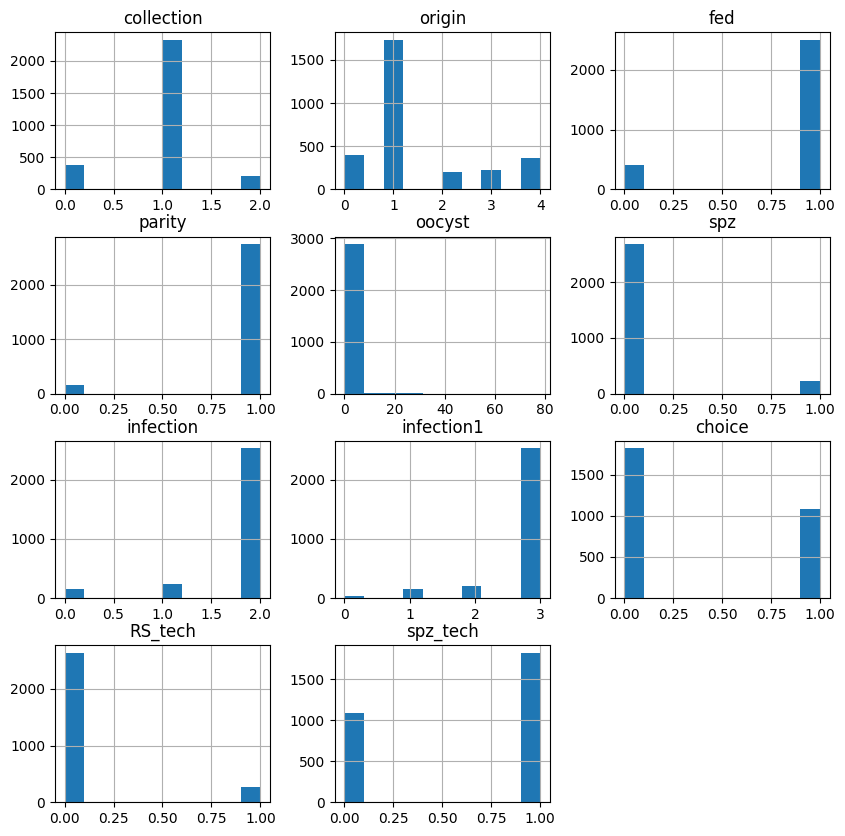

In [105]:
mosquito_data.hist(figsize=(10,10))

Generating a Logistic regression model and Training the model. based on the different districts.

- The Logistic regression model.

In [106]:
# creating a dataset with values of village = kitamilo
kitamilo_data = mosquito_data[mosquito_data['village'] == 'kitamilo']
kitamilo_data.head(10)

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
0,kitamilo,1,0,1,1,g,3,0,0,1,1,1,1
1,kitamilo,1,1,1,1,g,0,1,1,2,0,1,1
2,kitamilo,1,1,1,1,g,0,1,1,2,0,1,1
3,kitamilo,1,2,1,1,g,0,1,1,2,0,1,1
4,kitamilo,1,2,1,1,c,0,1,1,2,0,1,1
5,kitamilo,1,0,1,1,g,0,1,1,2,0,1,1
6,kitamilo,1,1,1,0,c,0,0,2,3,0,1,1
7,kitamilo,1,1,1,0,c,0,0,2,3,0,1,1
8,kitamilo,1,1,1,0,g,0,0,2,3,0,1,1
9,kitamilo,1,1,1,0,g,0,0,2,3,0,1,1


In [107]:
bukomansimbi_data = mosquito_data[mosquito_data['village'] == 'bukomansimbi']
bukomansimbi_data

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
272,bukomansimbi,0,3,0,1,c,0,1,1,2,1,0,1
273,bukomansimbi,0,4,0,1,c,0,1,1,2,0,0,1
274,bukomansimbi,0,4,0,1,c,0,1,1,2,0,0,1
275,bukomansimbi,0,3,0,1,c,0,1,1,2,1,0,1
276,bukomansimbi,0,3,0,1,c,0,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,bukomansimbi,2,3,0,1,c,0,0,2,3,1,0,1
1819,bukomansimbi,2,3,1,1,c,0,0,2,3,1,0,1
1820,bukomansimbi,2,3,0,1,c,0,0,2,3,1,0,1
1821,bukomansimbi,2,3,0,1,c,0,0,2,3,1,0,1


In [108]:
buvuma_data = mosquito_data[mosquito_data['village'] == 'buvuma']
buvuma_data

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
1823,buvuma,1,1,1,1,c,1,1,1,0,0,0,0
1824,buvuma,1,1,1,1,c,3,1,1,0,0,0,0
1825,buvuma,1,1,1,1,c,6,1,1,0,0,0,0
1826,buvuma,1,1,1,1,c,3,1,1,0,0,0,0
1827,buvuma,1,1,1,1,c,2,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,buvuma,1,1,1,1,c,0,0,2,3,1,0,0
2908,buvuma,1,1,1,1,c,0,0,2,3,1,0,0
2909,buvuma,1,1,1,1,c,0,0,2,3,1,0,0
2910,buvuma,1,1,1,1,c,0,0,2,3,1,0,0


In [109]:
# Dropping the village column 
# mosquito_data = mosquito_data.drop(['village'], axis = 1)
kitamilo_data = kitamilo_data.drop(['village'], axis = 1)
bukomansimbi_data = bukomansimbi_data.drop(['village'], axis = 1)
buvuma_data = buvuma_data.drop(['village'], axis = 1)


In [110]:
# Defining the target variable
y_target_kitamilo = kitamilo_data['species.mol ']
y_target_bukomansimbi = bukomansimbi_data['species.mol ']
y_target_buvuma = buvuma_data['species.mol ']

- splitting the data into training and testing sets.

In [111]:
traindata_kitamilo = kitamilo_data.drop(['species.mol '], axis = 1)
traindata_bukomansimbi = bukomansimbi_data.drop(['species.mol '], axis = 1) 
traindata_buvuma = buvuma_data.drop(['species.mol '], axis = 1)


- starting with Kitamilo district.

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, ytrain, ytest = train_test_split(traindata_kitamilo,y_target_kitamilo, test_size=0.2, random_state = 0)
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('y_train',ytrain.shape)
print('y_test',ytest.shape)

X_train (217, 11)
X_test (55, 11)
y_train (217,)
y_test (55,)


- Training the model using the set of features.

In [113]:
from sklearn.linear_model import LogisticRegression
import joblib
classifier = LogisticRegression(max_iter=1000).fit(x_train, ytrain)
filename = 'kitamilo_model.joblib'
joblib.dump(classifier, filename)


['kitamilo_model.joblib']

In [114]:
load_model = joblib.load(filename)
load_model.score(x_test, ytest)


0.7090909090909091

In [116]:
# Making predictions on the test data
y_pred = load_model.predict([[0,1,1,1,3,0,1,3,0,0,0]])
y_pred

array(['g'], dtype=object)

- using bukomansimbi

In [117]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, ytrain1, ytest1 = train_test_split(traindata_bukomansimbi,y_target_bukomansimbi, test_size=0.2, random_state = 0)
print('X_train',x_train1.shape)
print('X_test',x_test1.shape)
print('y_train',ytrain1.shape)
print('y_test',ytest1.shape)

X_train (1240, 11)
X_test (311, 11)
y_train (1240,)
y_test (311,)


Training the model

In [118]:
from sklearn.linear_model import LogisticRegression
import joblib
classifier1 = LogisticRegression(max_iter=1000).fit(x_train1, ytrain1)
filename1 = 'bukomansimbi_model.joblib'
joblib.dump(classifier1, filename1)


['bukomansimbi_model.joblib']

- load the model

In [120]:
load_model1 = joblib.load(filename1)
load_model1.score(x_test1, ytest1)

0.9839228295819936

In [121]:
y_pred = load_model1.predict([[0,1,1,1,3,0,1,3,0,0,0]])
y_pred

array(['c'], dtype=object)

- Training the model with buvuma data

In [122]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, ytrain2, ytest2 = train_test_split(traindata_buvuma,y_target_buvuma, test_size=0.2, random_state = 0)
print('X_train',x_train2.shape)
print('X_test',x_test2.shape)
print('y_train',ytrain2.shape)
print('y_test',ytest2.shape)

X_train (871, 11)
X_test (218, 11)
y_train (871,)
y_test (218,)


In [125]:
from sklearn.linear_model import LogisticRegression
import joblib
classifier2 = LogisticRegression(max_iter=1000).fit(x_train2, ytrain2)
filename2 = 'buvuma_model.joblib'
joblib.dump(classifier2, filename2)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'c'

The model cant be trained because buvuma has only one class c which is not enough for the model to train.

- Training with the whole dataset

In [126]:
mosquito_data = mosquito_data.drop(['village'], axis = 1)


In [127]:
y_target = mosquito_data['species.mol ']

In [128]:
X = mosquito_data.drop(['species.mol '], axis = 1)

- Splitting the data into training and testing sets.

In [129]:
x_train3, x_test3, ytrain3, ytest3 = train_test_split(X,y_target, test_size=0.2, random_state = 0)
print('X_train',x_train3.shape)
print('X_test',x_test3.shape)
print('y_train',ytrain3.shape)
print('y_test',ytest3.shape)


X_train (2329, 11)
X_test (583, 11)
y_train (2329,)
y_test (583,)


In [132]:
from sklearn.linear_model import LogisticRegression
import joblib
classifier3 = LogisticRegression(max_iter=1000).fit(x_train3, ytrain3)
filename3 = 'dataset_model.joblib'
joblib.dump(classifier3, filename3)

['dataset_model.joblib']

- Loading the model

In [133]:
load_model3 = joblib.load(filename3)
load_model3.score(x_test3, ytest3)

0.967409948542024

Making predictions

In [134]:
prediction = load_model3.predict([[0,1,1,1,3,0,1,3,0,0,0]])
prediction

array(['c'], dtype=object)

We can then conclude that the species.mol is c which stands for anopheles coluzzii. that has led to the malaria outbreak in Lwengo Village.